In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
def plotClass(X,y,p):
    for i in range(y.shape[1]):
        if y[0,i] == 0:
            plt.plot(X[0,i], X[1,i],'r'+p)
        else:
            plt.plot(X[0,i], X[1,i],'b'+p)

(200, 2)
(200, 1)


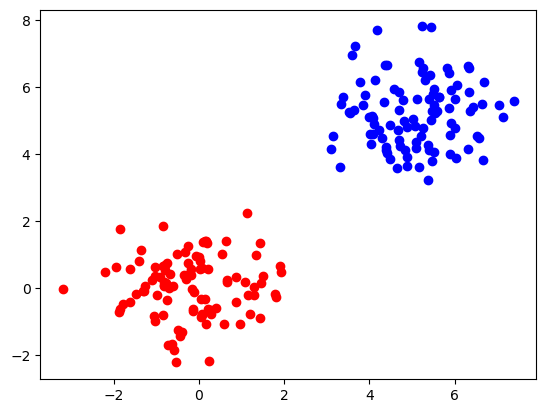

In [5]:
num_data=100 # data points per class

x1=np.random.randn(2,num_data)+5
x0=np.random.randn(2,num_data)

y1=np.ones((1,num_data))
y0=np.zeros((1,num_data))

X=np.concatenate((x1,x0),axis=1)
y=np.concatenate((y1,y0), axis=1)
plotClass(X,y,'o')
X = X.T
y = y.T
print(X.shape)
print(y.shape)

In [6]:
col = np.ones((X.shape[0], 1))

In [7]:
A = np.concatenate((col, X), axis =1)

In [8]:
def sigmoid(z):
  return 1/(1+np.exp(-z))
def loss(yhat, y):
  return np.sum(-y*np.log(yhat) - (1-y)*np.log(1-yhat), axis =0)

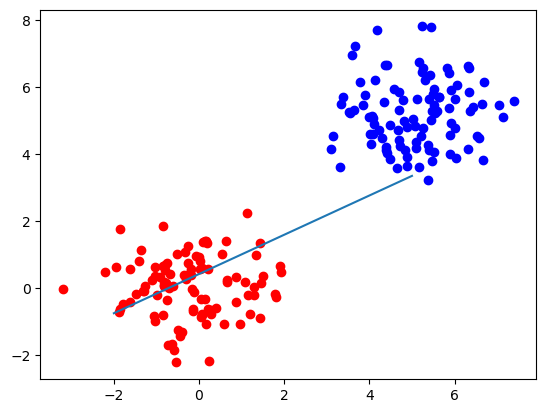

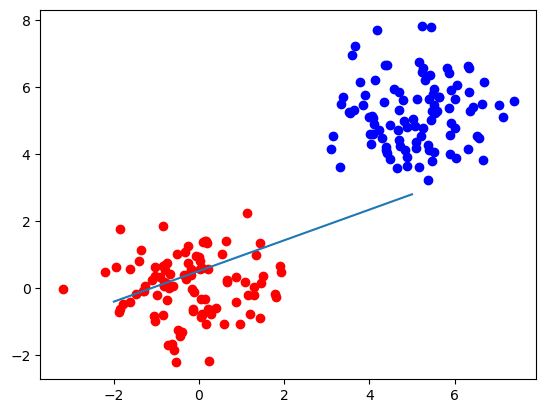

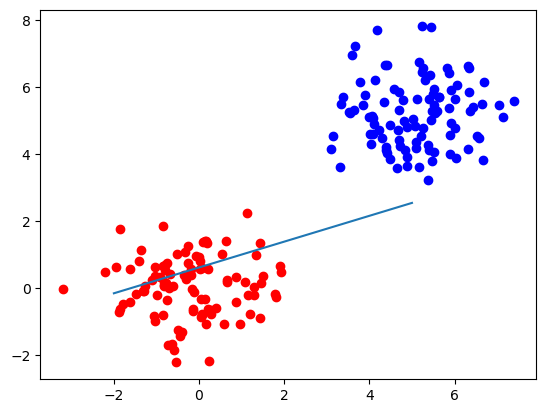

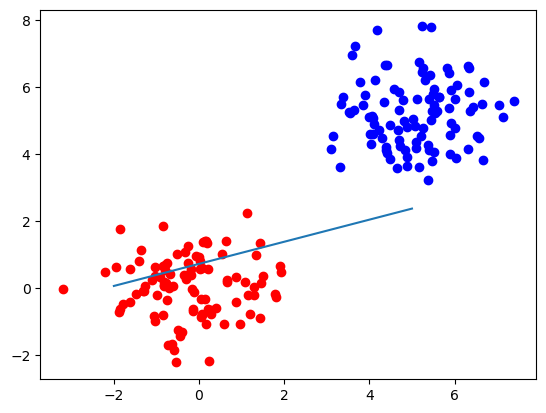

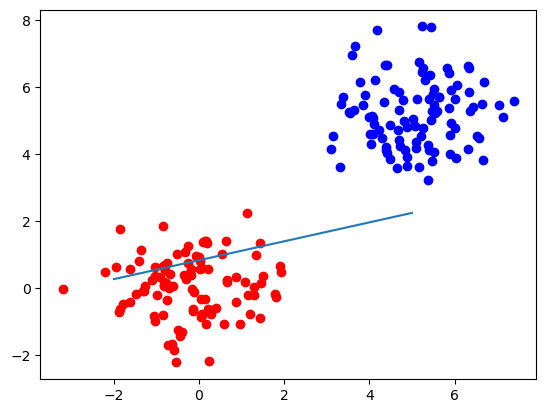

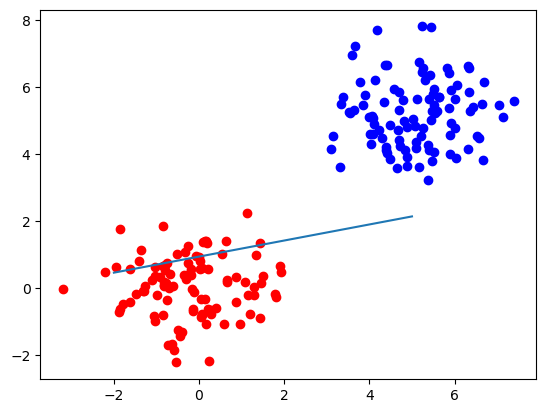

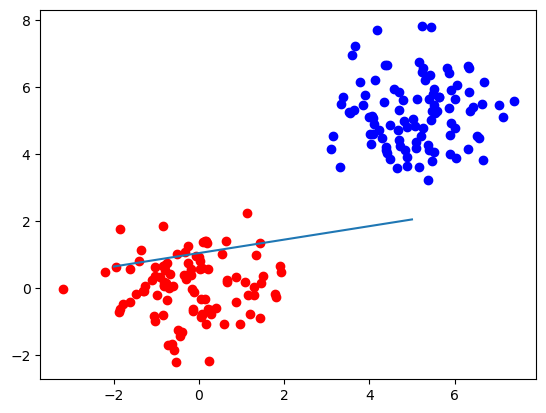

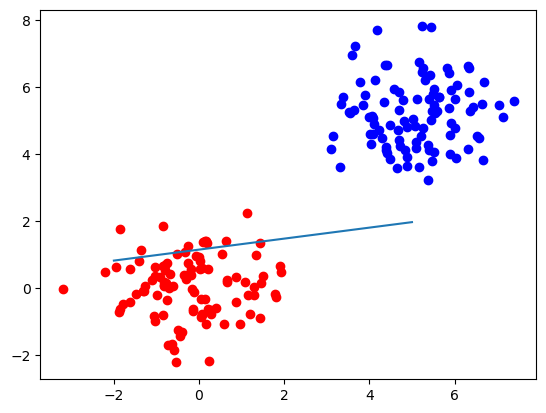

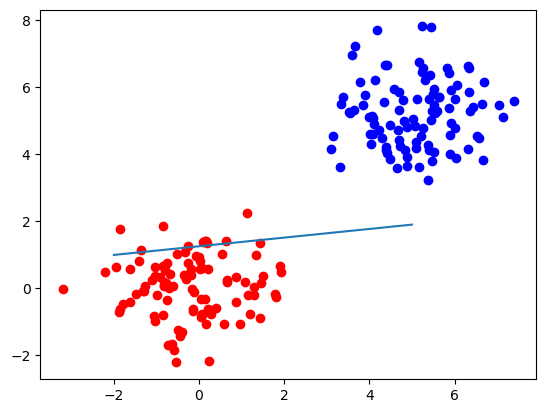

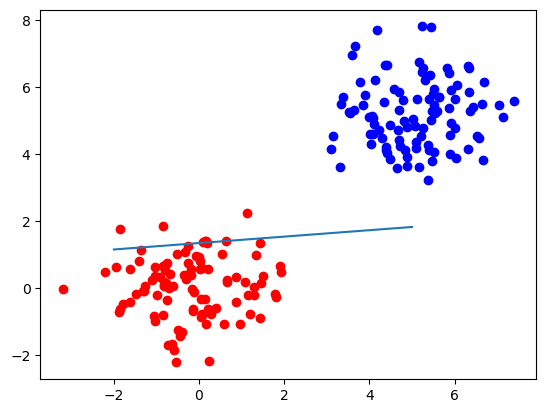

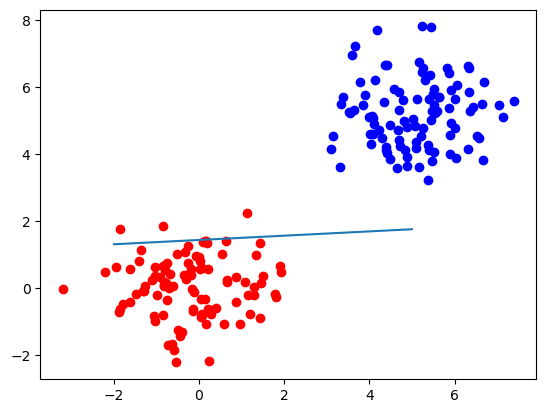

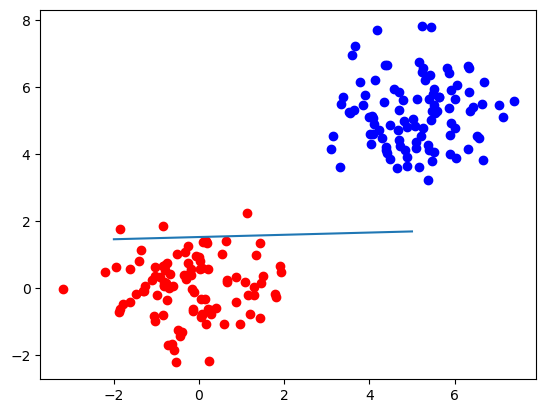

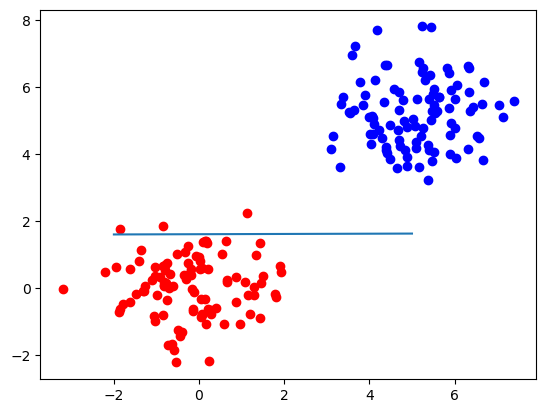

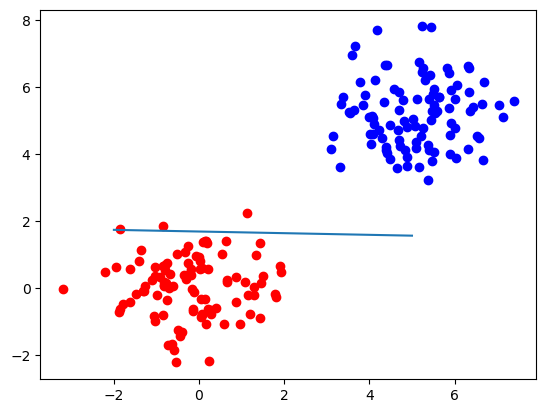

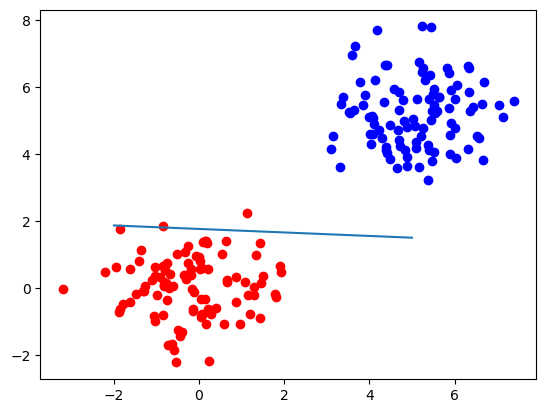

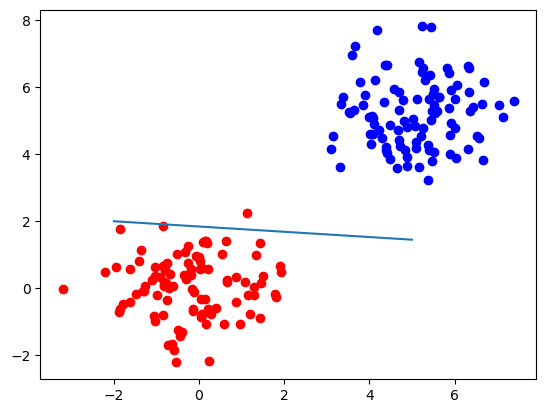

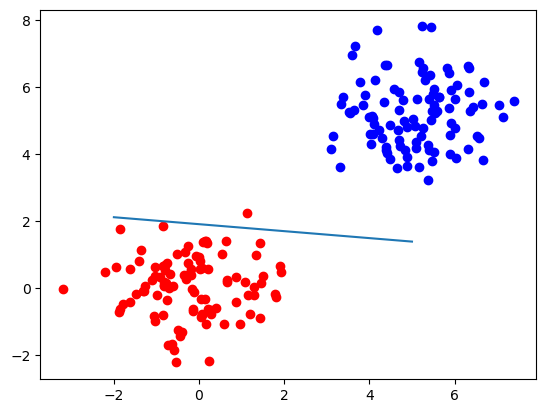

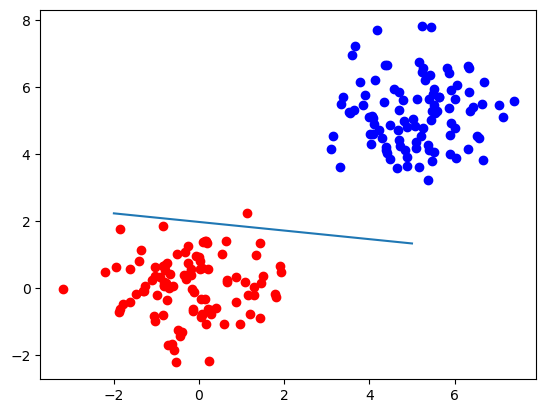

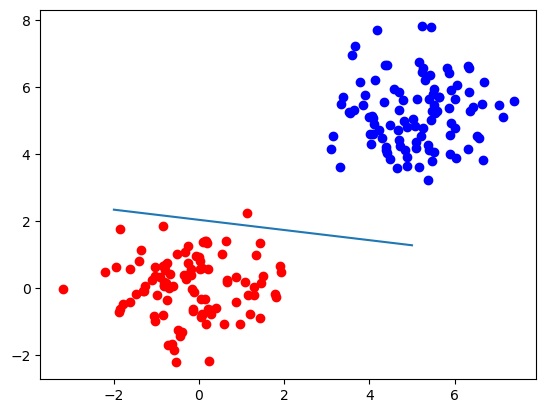

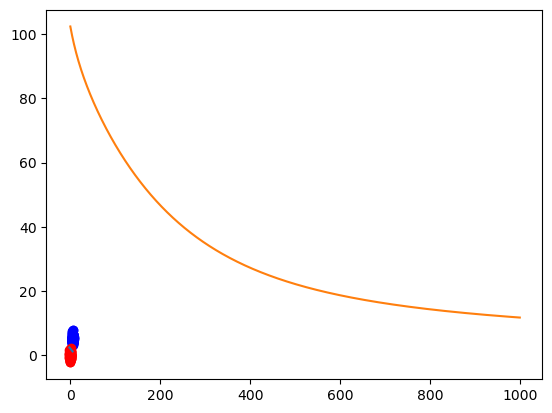

In [9]:
# Z = X@theta

# w is theta
w = np.random.randn(A.shape[1],1)

lr = 0.0001
ls = []

for i in range(1000):
  # X is represented by A 
  Z = A@w
  yhat = sigmoid(Z)
  l = loss(yhat, y)
  ls.append(l)
  #dw represent dL/dw
  # X is represented in the code by A
  dw = A.T @ (yhat - y)
    
  # plotting decison boundary
  if i%50 == 0:
    plt.figure()
    x1 = np.linspace(-2, 5 , 3)
    x2 = (-w[0] - w[1]*x1)/ w[2]
    plotClass(X.T,y.T,'o')
    plt.plot(x1,x2)


  w = w - lr*dw

plt.figure
plt.plot(ls)

In [10]:
# findding the decioshn boundyar

#z = w0 + w1*x1 + w2* x2
#z =0
#0 = w0 + w1*x1 + w2*x2
#x2 = (-w0 - w1*x1)/ w2

In [13]:
M = 1
Xbig = []
for i in range(M+1):
  for j in range (M+1):
    Xbig.append(X[:,0]**i * X[:,1]**j)

Xbig = np.array(Xbig).squeeze().T
Xbig = Xbig[:,:-1]
print(Xbig.shape)

(200, 3)


C:\Users\reemH\AppData\Local\Temp\ipykernel_9516\239843404.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


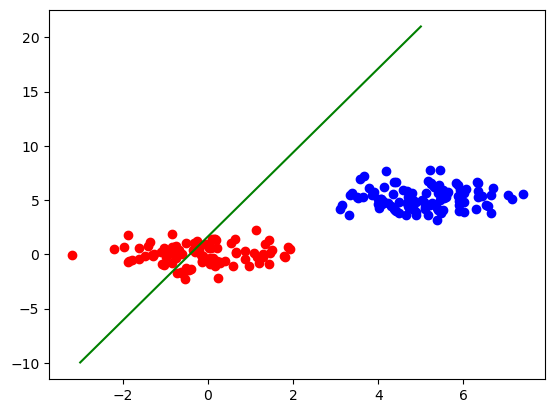

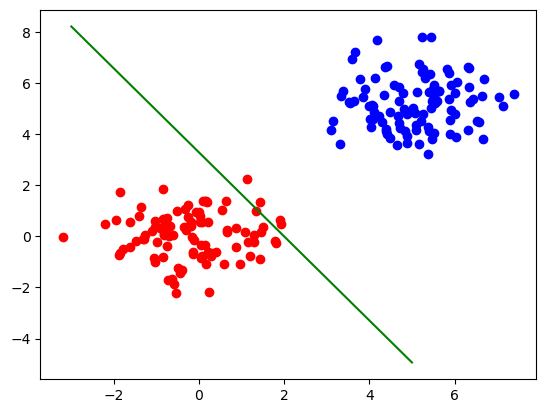

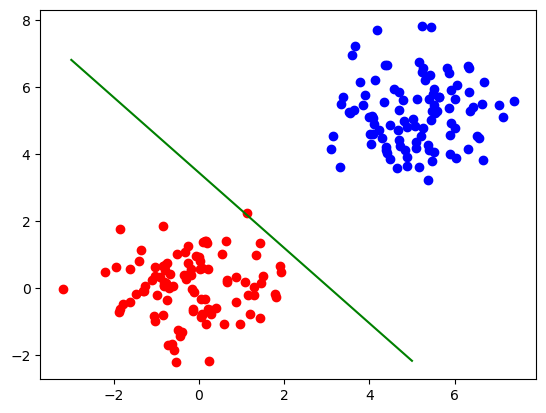

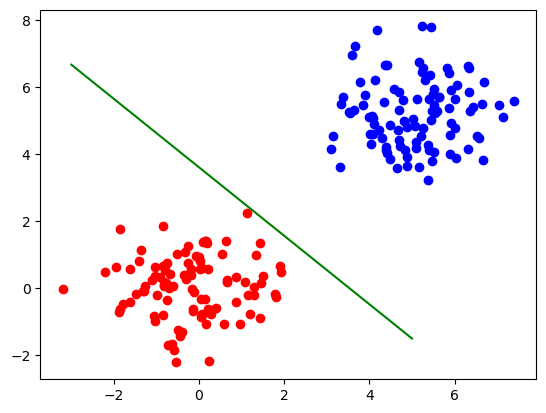

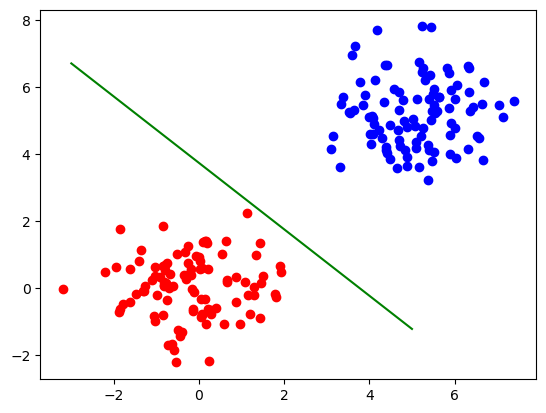

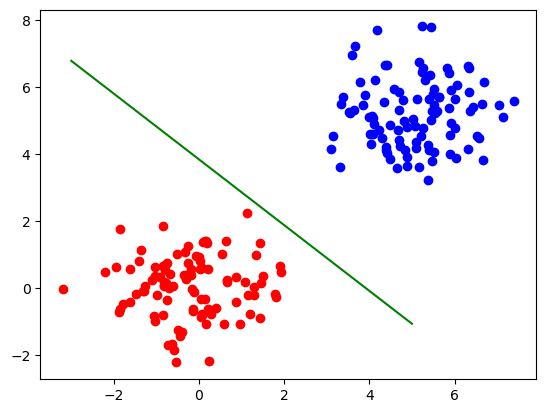

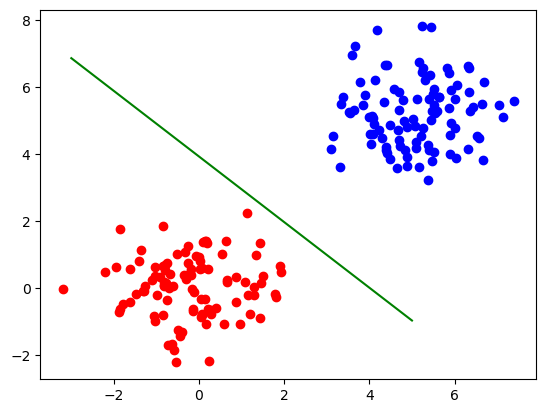

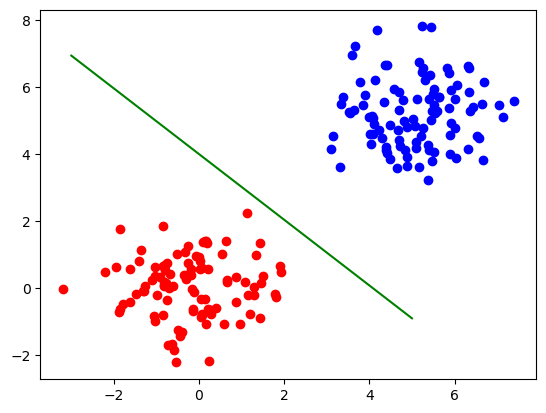

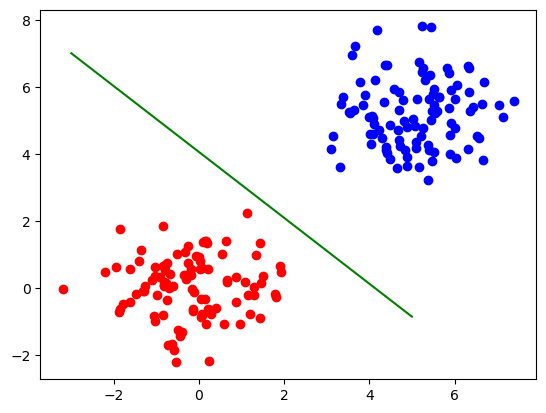

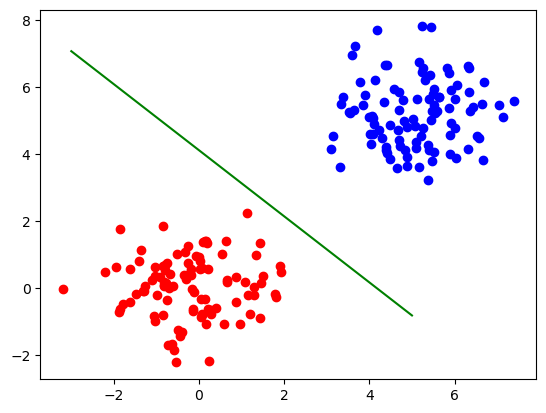

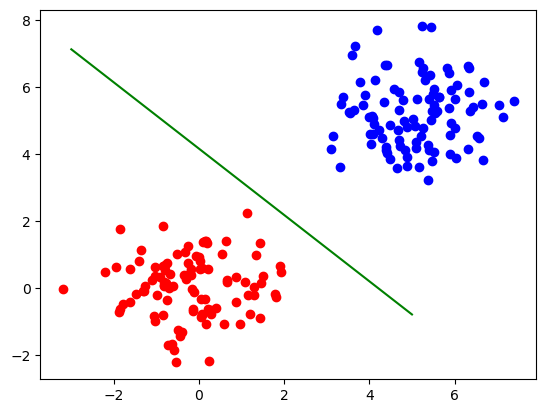

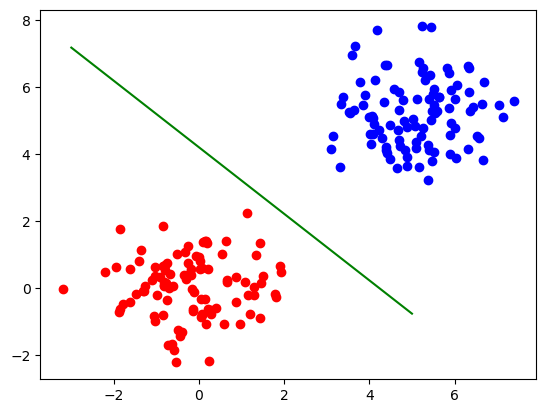

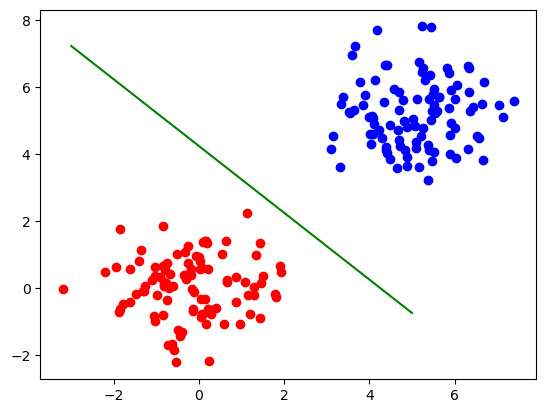

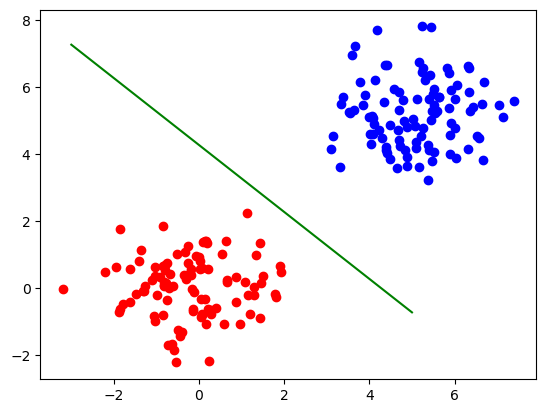

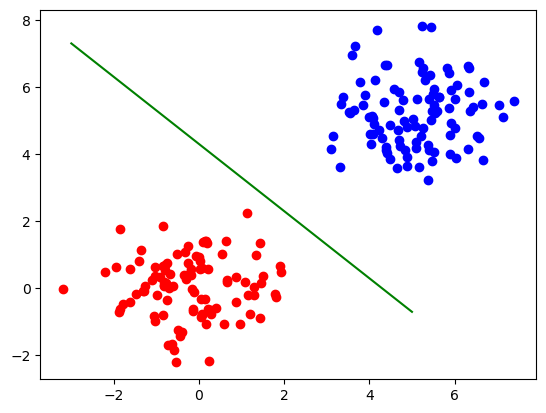

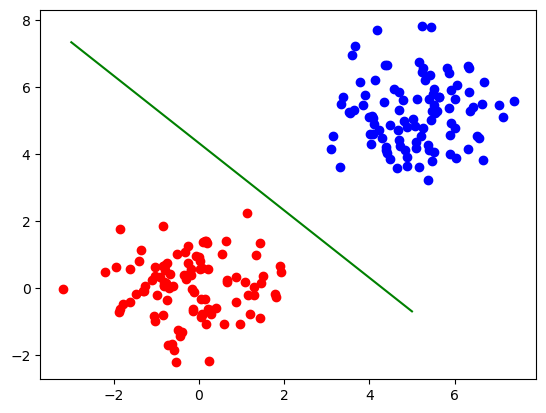

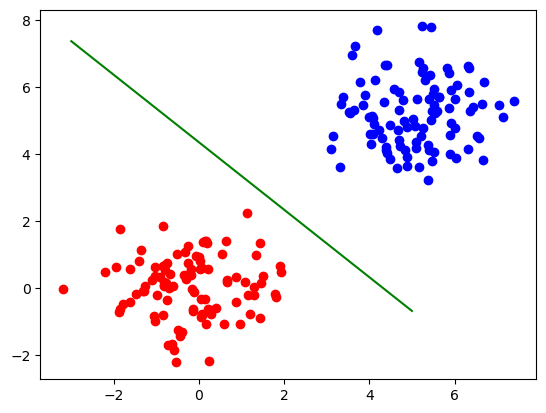

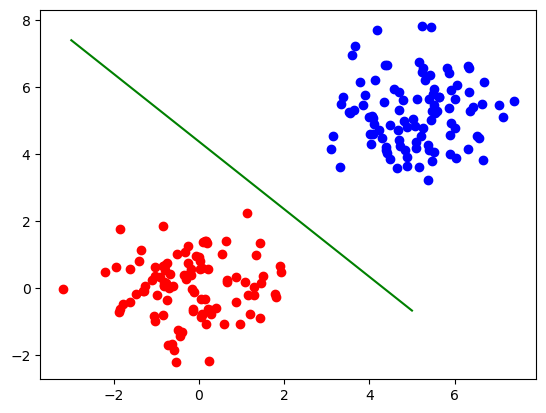

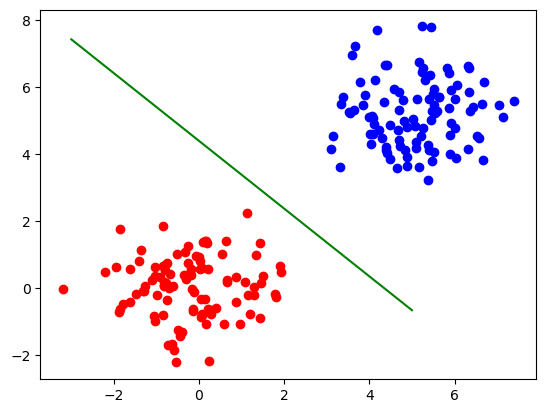

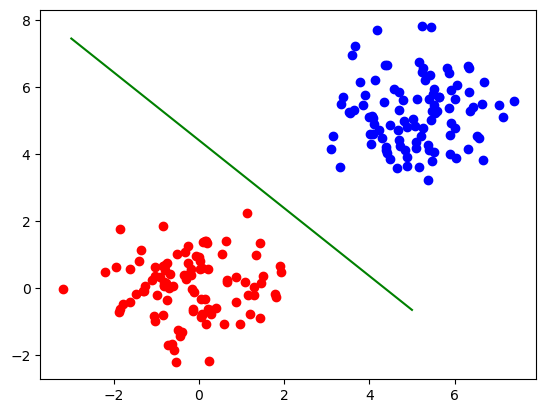

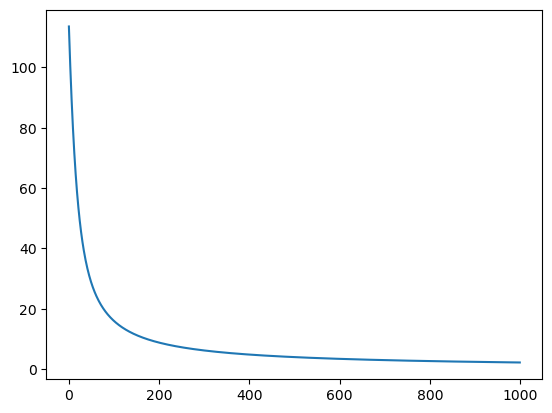

In [14]:
lr = 1e-3
w = np.random.randn(3,1)
ls = []
for i in range(1000):
  #forward pass
  z = Xbig@w
  yhat = sigmoid(z)
  l = loss(yhat, y)
  ls.append(l)

  # backward pass
  #dL/dw = dw
  dw = Xbig.T @ (yhat- y)
  w = w - lr*dw

  #plotting
  if i% 50 ==0:
    plt.figure()
    plotClass(X.T,y.T,'o')
    x1 = np.linspace(-3,5, 3)
    x2 = (-w[0] - w[1]*x1)/w[2]
    plt.plot(x1,x2, 'g')



plt.figure()
plt.plot(ls)

Step 1: Finding the distance from the decision boundary. X@w